In [31]:
import json

In [78]:
import requests
import pandas as pd

import matplotlib.pyplot as plt

In [21]:
def getDataFromUniProt(uniprot_id):
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.fasta"
    
    resp = requests.get(url)
    
    if resp.ok:
        return resp.text

In [22]:
getDataFromUniProt('P01308')

'>sp|P01308|INS_HUMAN Insulin OS=Homo sapiens OX=9606 GN=INS PE=1 SV=1\nMALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAED\nLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN\n'

In [25]:
def saveFastaFromUniProt(list_file_path):
    with open(list_file_path, 'r') as list_file:
        for uniprot_id in list_file:
            uniprot_id = uniprot_id.strip()
            
            fasta = getDataFromUniProt(uniprot_id)
            
            with open('./results.fasta', 'a') as out_file:
                out_file.write(fasta)

In [26]:
saveFastaFromUniProt('./list')

In [27]:
def getDataFromProteinsApi(uniprot_id):
    url = f"https://www.ebi.ac.uk/proteins/api/proteins/{uniprot_id}"
    
    resp = requests.get(url)
    
    if resp.ok:
        return resp.text

In [29]:
data = getDataFromProteinsApi("P01308")

In [63]:
def getSequenceFromProteinsAPI(list_file_path):
    with open(list_file_path, 'r') as list_file:
        for uniprot_id in list_file:
            uniprot_id = uniprot_id.strip()
            
            data = getDataFromProteinsApi(uniprot_id)
            data_dict = json.loads(data)
            
            sequence = data_dict['sequence']['sequence']
            
            with open('./data.csv', 'a') as out_csv:
                out_csv.write(
                    f'{uniprot_id},{sequence}\n'
                )

In [64]:
getSequenceFromProteinsAPI('./list')

In [66]:
df = pd.read_csv('./data.csv')

In [67]:
df

,uniprot_id,sequence
0,P04439,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
1,O95905,MEETMKLATMEDTVEYCLFLIPDESRDSDKHKEILQKYIERIITRF...
2,P42694,MEDRRAEKSCEQACESLKRQDYEMALKHCTEALLSLGQYSMADFTG...
3,P08246,MTLGRRLACLFLACVLPALLLGGTALASEIVGGRRARPHAWPFMVS...
4,Q6ZWK4,MLTEVMEVWHGLVIAVVSLFLQACFLTAINYLLSRHMAHKSEQILK...


In [68]:
def f(x,y):
    return x+y

In [69]:
f(4,7)

11

In [70]:
f = lambda x,y: x+y

In [71]:
f(4,7)

11

In [72]:
df['M'] = df['sequence'].apply(lambda s: s.count('M'))

In [73]:
df

,uniprot_id,sequence,M
0,P04439,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,8
1,O95905,MEETMKLATMEDTVEYCLFLIPDESRDSDKHKEILQKYIERIITRF...,14
2,P42694,MEDRRAEKSCEQACESLKRQDYEMALKHCTEALLSLGQYSMADFTG...,29
3,P08246,MTLGRRLACLFLACVLPALLLGGTALASEIVGGRRARPHAWPFMVS...,4
4,Q6ZWK4,MLTEVMEVWHGLVIAVVSLFLQACFLTAINYLLSRHMAHKSEQILK...,6


In [74]:
df['M'].mean()

12.2

In [75]:
df['M'].median()

8.0

In [76]:
df['M'].min()

4

In [77]:
df['M'].max()

29

Text(0.5, 0, 'uniprot id')

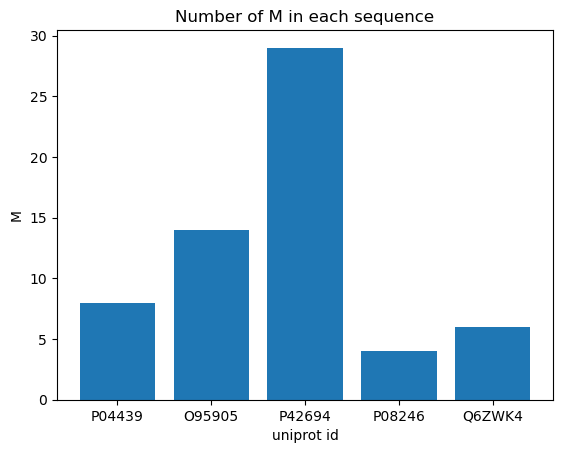

In [81]:
plt.bar(
    list(df['uniprot_id']), list(df['M'])
)

plt.title("Number of M in each sequence")
plt.ylabel('M')
plt.xlabel('uniprot id')